# Dogs vs Cats classification

The Dogs vs. Cats dataset was made available by Kaggle as part of a computer vision competition in late 2013, back when convnets weren’t mainstream. The pictures in this dataset are medium-resolution color JPEGs.

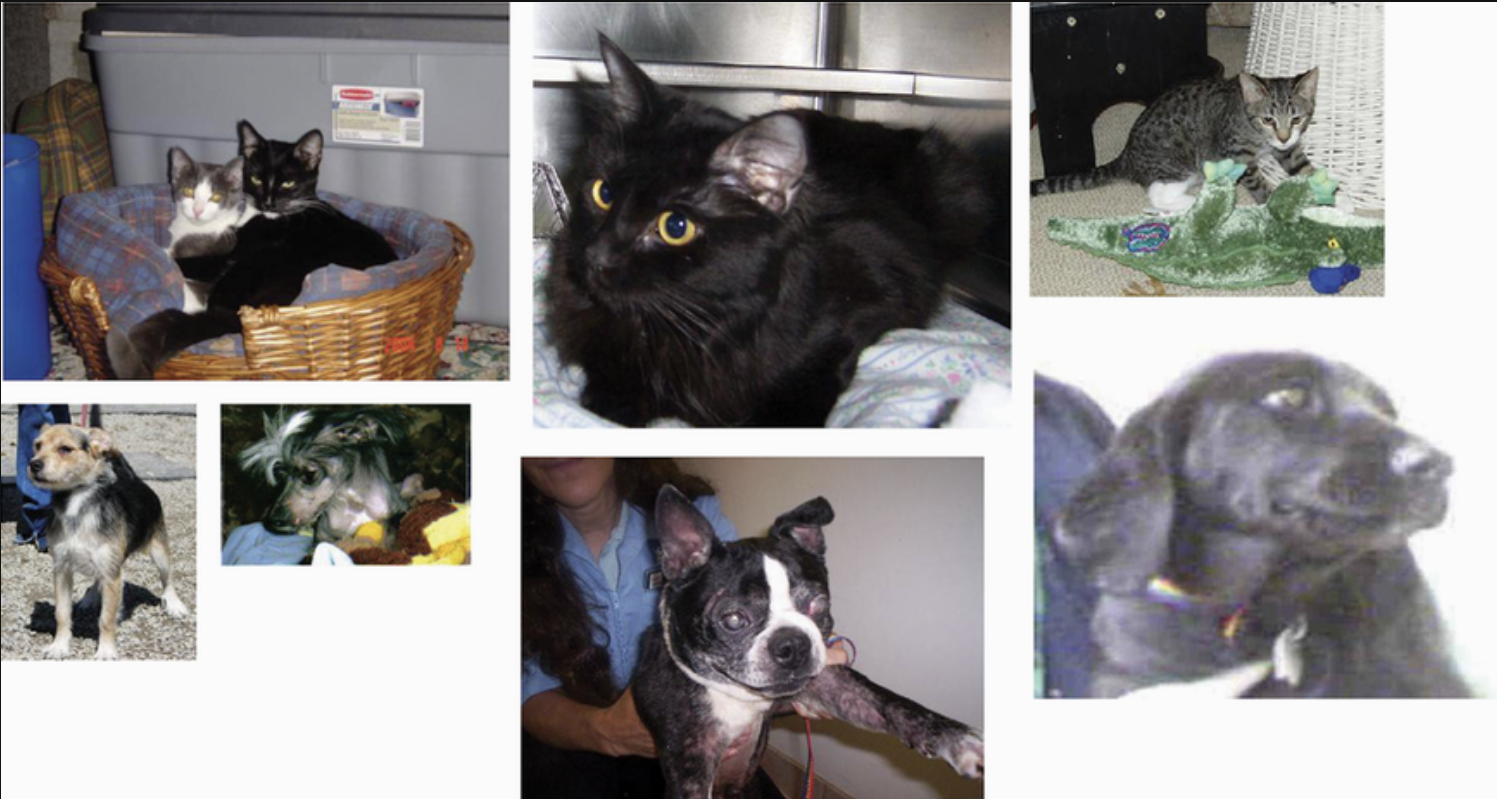

### Building the model

We will start using a general model structure: the convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

2025-06-17 06:20:49.328540: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-17 06:20:49.603695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Instantiating a small convnet for dogs vs. cats classification

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # Sigmoid activation is used in binary-classification problems
model = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compilation step: Configuring the model for training

model.compile(loss="binary_crossentropy", #Because we ended the model with a single sigmoid unit, we’ll use binary crossentropy as the loss
              optimizer="rmsprop",
              metrics=["accuracy"])

Keras features the utility function image_dataset_from_ directory(), which lets you quickly set up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors:

1. Read the picture files.

2. Decode the JPEG content to RGB grids of pixels.

3. Convert these into floating-point tensors.

4. Resize them to a shared size (we’ll use 180 × 180).

5. Pack them into batches (we’ll use batches of 32 images).

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

base_dir = pathlib.Path(f"/tf-gpu/media/deep_learning_with_python/08_convnets_dogs_vs_cats/cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    color_mode="rgb",
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    color_mode="rgb",
    batch_size=32)
test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    color_mode="rgb",
    batch_size=32)

TensorFlow makes available the tf.data API to create efficient input pipelines for machine learning models. Its core class is tf.data.Dataset.

A Dataset object is an iterator: you can use it in a for loop. It will typically return batches of input data and labels. You can pass a Dataset object directly to the fit() method of a Keras model.

The Dataset class handles many key features that would otherwise be cumbersome to implement yourself—in particular, asynchronous data prefetching (preprocessing the next batch of data while the previous one is being handled by the model, which keeps execution flowing without interruptions).

The Dataset class also exposes a functional-style API for modifying datasets.

In [5]:
# Displaying the shapes of the data and labels yielded by the `Dataset`:

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Note that we’ll also use a ModelCheckpoint callback to save the model after each epoch. We’ll configure it with the path specifying where to save the file, as well as the arguments save_best_only=True and monitor="val_loss": they tell the callback to only save a new file (overwriting any previous one) when the current value of the val_loss metric is lower than at any previous time during training.

This guarantees that your saved file will always contain the state of the model corresponding to its best-performing training epoch, in terms of its performance on the validation data. 

In [6]:
# Fitting the model using a `Dataset`

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/tf-gpu/media/deep_learning_with_python/08_convnets_dogs_vs_cats/convnet_from_scratch/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


I0000 00:00:1750139581.336891   40525 service.cc:145] XLA service 0x717018017600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750139581.337041   40525 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-06-17 05:53:01.365109: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-17 05:53:01.494716: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 5/63 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4490 - loss: 0.9003

I0000 00:00:1750139585.224539   40525 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5071 - loss: 0.7419

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.5072 - loss: 0.7413 - val_accuracy: 0.6370 - val_loss: 0.6909
Epoch 2/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5647 - loss: 0.6895

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5640 - loss: 0.6897 - val_accuracy: 0.6500 - val_loss: 0.6855
Epoch 3/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5774 - loss: 0.6829

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5773 - loss: 0.6829 - val_accuracy: 0.5010 - val_loss: 0.6840
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6057 - loss: 0.6633

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6058 - loss: 0.6633 - val_accuracy: 0.6520 - val_loss: 0.6389
Epoch 5/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6452 - loss: 0.6305

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6454 - loss: 0.6303 - val_accuracy: 0.6550 - val_loss: 0.6089
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6919 - loss: 0.5985

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6921 - loss: 0.5983 - val_accuracy: 0.7120 - val_loss: 0.5697
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7140 - loss: 0.5656 - val_accuracy: 0.6940 - val_loss: 0.5759
Epoch 8/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7383 - loss: 0.5217

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7388 - loss: 0.5218 - val_accuracy: 0.7190 - val_loss: 0.5616
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7492 - loss: 0.4757 - val_accuracy: 0.7090 - val_loss: 0.5792
Epoch 10/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7974 - loss: 0.4426

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7979 - loss: 0.4421 - val_accuracy: 0.7230 - val_loss: 0.5558
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8202 - loss: 0.3743 - val_accuracy: 0.7200 - val_loss: 0.5896
Epoch 12/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8631 - loss: 0.3188 - val_accuracy: 0.7530 - val_loss: 0.6494
Epoch 13/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8910 - loss: 0.2580 - val_accuracy: 0.7100 - val_loss: 0.8167
Epoch 14/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9199 - loss: 0.2066 - val_accuracy: 0.7580 - val_loss: 0.8252
Epoch 15/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9276 - loss: 0.1727 - val_accuracy: 0.7500 - val_loss: 0.9181
Epoch 16/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9565 - loss: 0.1241 - val_accuracy: 0.7150 - val_loss: 1.2553
Epoch 17/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9544 - loss: 0.1062 - val_accuracy: 0.7360 - val_loss: 1.2197
Epoch 18/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9729 - loss: 0.0802 - val_accuracy: 0.7530 - val_loss: 1.1909
Epoch 19/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9775 - loss: 0.0700 - val_accuracy: 0.7310 - val_loss: 1.1121
Epoch 20/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9843 - loss: 0.0480

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9839 - loss: 0.0488 - val_accuracy: 0.7590 - val_loss: 1.0845
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9911 - loss: 0.0333 - val_accuracy: 0.7290 - val_loss: 1.6842
Epoch 22/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9841 - loss: 0.0416 - val_accuracy: 0.7510 - val_loss: 1.5257
Epoch 23/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9875 - loss: 0.0414 - val_accuracy: 0.7480 - val_loss: 1.7366
Epoch 24/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9879 - loss: 0.0352 - val_accuracy: 0.7610 - val_loss: 1.7759
Epoch 25/30


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9856 - loss: 0.0379

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9858 - loss: 0.0375 - val_accuracy: 0.7630 - val_loss: 1.8369
Epoch 26/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9893 - loss: 0.0383

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9892 - loss: 0.0388 - val_accuracy: 0.7640 - val_loss: 1.7727
Epoch 27/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9886 - loss: 0.0434

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9886 - loss: 0.0434 - val_accuracy: 0.7360 - val_loss: 1.6359
Epoch 28/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9911 - loss: 0.0237

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9910 - loss: 0.0240 - val_accuracy: 0.7200 - val_loss: 1.7932
Epoch 29/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9900 - loss: 0.0276

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9901 - loss: 0.0275 - val_accuracy: 0.7220 - val_loss: 2.2705
Epoch 30/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9865 - loss: 0.0392

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9866 - loss: 0.0388 - val_accuracy: 0.7310 - val_loss: 2.1277


Let’s plot the loss and accuracy of the model over the training and validation data during training

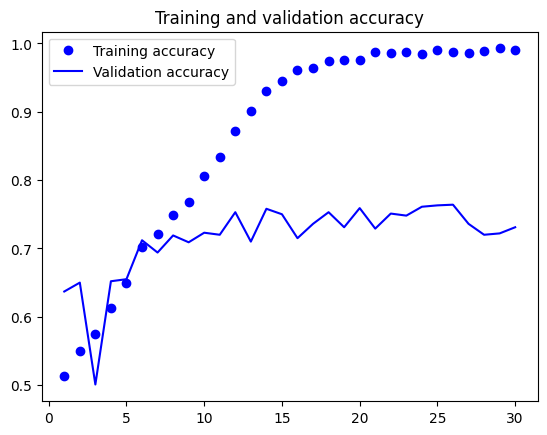

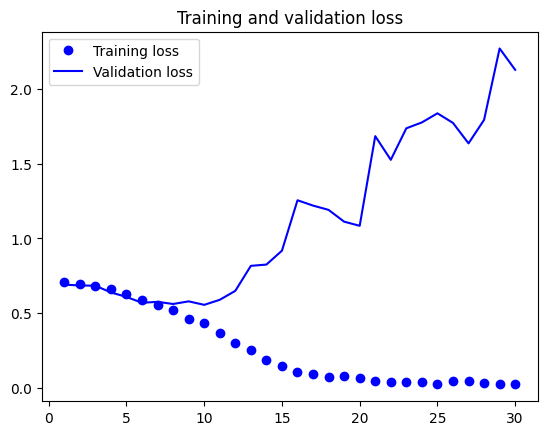

In [7]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy peaks at 75%. The validation loss reaches its minimum after only ten epochs and then stalls, whereas the training loss keeps decreasing linearly as training proceeds.

Let’s check the test accuracy. We’ll reload the model from its saved file to evaluate it as it was before it started overfitting.

In [8]:
# Evaluating the model on the test set:

test_model = keras.models.load_model(
    "/tf-gpu/media/deep_learning_with_python/08_convnets_dogs_vs_cats/convnet_from_scratch/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

20/63 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7420 - loss: 0.5341

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7347 - loss: 0.5553
Test accuracy: 0.723


## Using data augmentation

Because we have relatively few training samples (2,000), overfitting will be our number one concern. Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that, at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data so it can generalize better.

In [3]:
#Define a data augmentation stage to add to an image model

#RandomFlip("horizontal")—Applies horizontal flipping to a random 50% of the images that go through it.
#These are fractions of a full circle—in degrees, the range would be [–36 degrees, +36 degrees]:
#RandomRotation(0.1)—Rotates the input images by a random value in the range [–10%, +10%]
#RandomZoom(0.2)—Zooms in or out of the image by a random factor in the range [-20%, +20%]

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Let’s look at the augmented images

2025-06-17 05:54:34.677754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


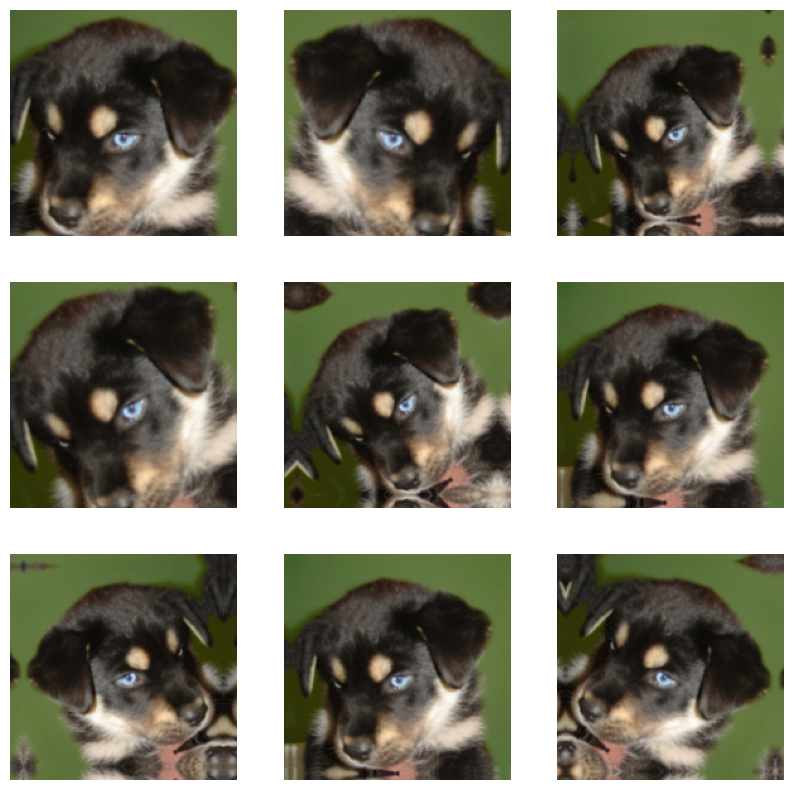

In [10]:
# Displaying some randomly good boys augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

If we train a new model using this data-augmentation configuration, the model will never see the same input twice. But the inputs it sees are still heavily intercorrelated because they come from a small number of original images—we can’t produce new information; we can only remix existing information.


As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, we’ll also add a Dropout layer to our model right before the densely connected classifier.

In [11]:
# Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Let’s train the model using data augmentation and dropout. Because we expect overfitting to occur much later during training, we will train for three times as many epochs—one hundred.

In [12]:
#Training the regularized convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4984 - loss: 0.7034

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.4983 - loss: 0.7033 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5149 - loss: 0.6936

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5149 - loss: 0.6936 - val_accuracy: 0.6000 - val_loss: 0.6900
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5293 - loss: 0.6943

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5295 - loss: 0.6942 - val_accuracy: 0.5060 - val_loss: 0.6917
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5738 - loss: 0.7843

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5737 - loss: 0.7832 - val_accuracy: 0.6400 - val_loss: 0.6746
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6179 - loss: 0.6691

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6178 - loss: 0.6691 - val_accuracy: 0.5940 - val_loss: 0.6580
Epoch 6/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6264 - loss: 0.6531

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6262 - loss: 0.6532 - val_accuracy: 0.6560 - val_loss: 0.6250
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6510 - loss: 0.6350

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6511 - loss: 0.6349 - val_accuracy: 0.6030 - val_loss: 0.6650
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6652 - loss: 0.6169

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6653 - loss: 0.6168 - val_accuracy: 0.6600 - val_loss: 0.6173
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6751 - loss: 0.6047

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6752 - loss: 0.6046 - val_accuracy: 0.6540 - val_loss: 0.5967
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6683 - loss: 0.5968

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6686 - loss: 0.5967 - val_accuracy: 0.6340 - val_loss: 0.6508
Epoch 11/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6984 - loss: 0.5770

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6986 - loss: 0.5766 - val_accuracy: 0.6610 - val_loss: 0.6204
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7010 - loss: 0.5717

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7012 - loss: 0.5715 - val_accuracy: 0.6880 - val_loss: 0.6202
Epoch 13/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7068 - loss: 0.5558

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7076 - loss: 0.5556 - val_accuracy: 0.7190 - val_loss: 0.5340
Epoch 14/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7300 - loss: 0.5421

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7301 - loss: 0.5423 - val_accuracy: 0.7240 - val_loss: 0.5409
Epoch 15/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7273 - loss: 0.5313

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7276 - loss: 0.5313 - val_accuracy: 0.6990 - val_loss: 0.6283
Epoch 16/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7567 - loss: 0.4990

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7568 - loss: 0.4992 - val_accuracy: 0.7130 - val_loss: 0.5466
Epoch 17/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7484 - loss: 0.5046

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7486 - loss: 0.5045 - val_accuracy: 0.7790 - val_loss: 0.4737
Epoch 18/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7471 - loss: 0.4934

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7474 - loss: 0.4936 - val_accuracy: 0.5840 - val_loss: 1.0215
Epoch 19/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7430 - loss: 0.5450

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7434 - loss: 0.5442 - val_accuracy: 0.7810 - val_loss: 0.4673
Epoch 20/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7961 - loss: 0.4653

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7960 - loss: 0.4653 - val_accuracy: 0.8080 - val_loss: 0.4329
Epoch 21/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7741 - loss: 0.4557

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7742 - loss: 0.4558 - val_accuracy: 0.7980 - val_loss: 0.4232
Epoch 22/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8039 - loss: 0.4266

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8037 - loss: 0.4268 - val_accuracy: 0.7100 - val_loss: 0.6973
Epoch 23/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7908 - loss: 0.4551

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7908 - loss: 0.4550 - val_accuracy: 0.8020 - val_loss: 0.4231
Epoch 24/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8011 - loss: 0.4281

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8011 - loss: 0.4280 - val_accuracy: 0.7980 - val_loss: 0.4262
Epoch 25/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8154 - loss: 0.4052

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8154 - loss: 0.4052 - val_accuracy: 0.7070 - val_loss: 0.7812
Epoch 26/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8072 - loss: 0.4366

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8072 - loss: 0.4361 - val_accuracy: 0.7850 - val_loss: 0.4438
Epoch 27/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8170 - loss: 0.3974

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8170 - loss: 0.3974 - val_accuracy: 0.7790 - val_loss: 0.4905
Epoch 28/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8150 - loss: 0.3927

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8156 - loss: 0.3924 - val_accuracy: 0.8200 - val_loss: 0.4213
Epoch 29/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8317 - loss: 0.3806

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8318 - loss: 0.3804 - val_accuracy: 0.8010 - val_loss: 0.5166
Epoch 30/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8228 - loss: 0.4094

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8228 - loss: 0.4091 - val_accuracy: 0.8160 - val_loss: 0.4160
Epoch 31/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8332 - loss: 0.3949

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8333 - loss: 0.3946 - val_accuracy: 0.8010 - val_loss: 0.4467
Epoch 32/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8388 - loss: 0.3630

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8389 - loss: 0.3628 - val_accuracy: 0.8120 - val_loss: 0.4401
Epoch 33/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8295 - loss: 0.3941

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8295 - loss: 0.3938 - val_accuracy: 0.8050 - val_loss: 0.4233
Epoch 34/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8275 - loss: 0.3638

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8277 - loss: 0.3637 - val_accuracy: 0.8110 - val_loss: 0.4973
Epoch 35/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8539 - loss: 0.3290

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8539 - loss: 0.3292 - val_accuracy: 0.7970 - val_loss: 0.4386
Epoch 36/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8601 - loss: 0.3293

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8601 - loss: 0.3291 - val_accuracy: 0.8300 - val_loss: 0.4414
Epoch 37/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8719 - loss: 0.3270

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8718 - loss: 0.3269 - val_accuracy: 0.8480 - val_loss: 0.4423
Epoch 38/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8673 - loss: 0.3127

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8674 - loss: 0.3128 - val_accuracy: 0.7730 - val_loss: 0.6691
Epoch 39/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8645 - loss: 0.3059

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8647 - loss: 0.3058 - val_accuracy: 0.8120 - val_loss: 0.4562
Epoch 40/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8653 - loss: 0.3154

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8654 - loss: 0.3153 - val_accuracy: 0.8330 - val_loss: 0.3967
Epoch 41/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8657 - loss: 0.3184

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8657 - loss: 0.3181 - val_accuracy: 0.8280 - val_loss: 0.4685
Epoch 42/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8834 - loss: 0.2971

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8833 - loss: 0.2972 - val_accuracy: 0.8300 - val_loss: 0.3998
Epoch 43/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8859 - loss: 0.2747

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8858 - loss: 0.2749 - val_accuracy: 0.8060 - val_loss: 0.4391
Epoch 44/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8718 - loss: 0.3010

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8719 - loss: 0.3008 - val_accuracy: 0.8430 - val_loss: 0.4200
Epoch 45/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8805 - loss: 0.2828

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8808 - loss: 0.2822 - val_accuracy: 0.8390 - val_loss: 0.4562
Epoch 46/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8872 - loss: 0.2617

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8872 - loss: 0.2619 - val_accuracy: 0.8310 - val_loss: 0.4090
Epoch 47/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8884 - loss: 0.2595

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8884 - loss: 0.2597 - val_accuracy: 0.7950 - val_loss: 0.5064
Epoch 48/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8956 - loss: 0.2551

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8956 - loss: 0.2551 - val_accuracy: 0.7800 - val_loss: 0.4943
Epoch 49/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8820 - loss: 0.2646

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8821 - loss: 0.2646 - val_accuracy: 0.8360 - val_loss: 0.4239
Epoch 50/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9048 - loss: 0.2596

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9047 - loss: 0.2596 - val_accuracy: 0.8190 - val_loss: 0.4938
Epoch 51/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8916 - loss: 0.2585

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8917 - loss: 0.2584 - val_accuracy: 0.8230 - val_loss: 0.4661
Epoch 52/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9109 - loss: 0.2275

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9109 - loss: 0.2276 - val_accuracy: 0.8180 - val_loss: 0.4930
Epoch 53/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9085 - loss: 0.2216

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9086 - loss: 0.2216 - val_accuracy: 0.8310 - val_loss: 0.4328
Epoch 54/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9119 - loss: 0.2048

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9119 - loss: 0.2049 - val_accuracy: 0.8410 - val_loss: 0.4015
Epoch 55/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9165 - loss: 0.2167

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9164 - loss: 0.2168 - val_accuracy: 0.8550 - val_loss: 0.4167
Epoch 56/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8872 - loss: 0.2586

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8873 - loss: 0.2584 - val_accuracy: 0.8320 - val_loss: 0.4947
Epoch 57/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9208 - loss: 0.2130

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9207 - loss: 0.2132 - val_accuracy: 0.8370 - val_loss: 0.4561
Epoch 58/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9271 - loss: 0.1846

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9269 - loss: 0.1848 - val_accuracy: 0.8340 - val_loss: 0.4929
Epoch 59/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9207 - loss: 0.1997

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9207 - loss: 0.1997 - val_accuracy: 0.8500 - val_loss: 0.4431
Epoch 60/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9143 - loss: 0.2195

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9145 - loss: 0.2191 - val_accuracy: 0.8330 - val_loss: 0.5619
Epoch 61/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9407 - loss: 0.1827

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9406 - loss: 0.1829 - val_accuracy: 0.8200 - val_loss: 0.5236
Epoch 62/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9136 - loss: 0.2038

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9137 - loss: 0.2038 - val_accuracy: 0.8330 - val_loss: 0.4795
Epoch 63/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9172 - loss: 0.2133

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9173 - loss: 0.2132 - val_accuracy: 0.7990 - val_loss: 0.6597
Epoch 64/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9077 - loss: 0.2324

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9079 - loss: 0.2321 - val_accuracy: 0.8360 - val_loss: 0.5622
Epoch 65/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9210 - loss: 0.1922

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9211 - loss: 0.1922 - val_accuracy: 0.8390 - val_loss: 0.6124
Epoch 66/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9123 - loss: 0.2022

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9125 - loss: 0.2022 - val_accuracy: 0.8560 - val_loss: 0.4720
Epoch 67/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9221 - loss: 0.2010

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9221 - loss: 0.2009 - val_accuracy: 0.8190 - val_loss: 0.7314
Epoch 68/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9247 - loss: 0.2086

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9248 - loss: 0.2085 - val_accuracy: 0.8400 - val_loss: 0.4828
Epoch 69/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9163 - loss: 0.1947

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9164 - loss: 0.1945 - val_accuracy: 0.8470 - val_loss: 0.7106
Epoch 70/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9139 - loss: 0.1989

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9141 - loss: 0.1987 - val_accuracy: 0.7630 - val_loss: 1.0099
Epoch 71/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9115 - loss: 0.2271

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9120 - loss: 0.2258 - val_accuracy: 0.8680 - val_loss: 0.4935
Epoch 72/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9274 - loss: 0.1961

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9274 - loss: 0.1959 - val_accuracy: 0.8470 - val_loss: 0.4830
Epoch 73/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9335 - loss: 0.1716

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9335 - loss: 0.1717 - val_accuracy: 0.8570 - val_loss: 0.5041
Epoch 74/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9431 - loss: 0.1541

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9431 - loss: 0.1542 - val_accuracy: 0.8630 - val_loss: 0.5188
Epoch 75/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9372 - loss: 0.1776

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9371 - loss: 0.1777 - val_accuracy: 0.8010 - val_loss: 0.7548
Epoch 76/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9428 - loss: 0.1701

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9428 - loss: 0.1701 - val_accuracy: 0.8600 - val_loss: 0.4575
Epoch 77/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9347 - loss: 0.1638

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9346 - loss: 0.1641 - val_accuracy: 0.8430 - val_loss: 0.6838
Epoch 78/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9419 - loss: 0.1463

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9419 - loss: 0.1463 - val_accuracy: 0.8520 - val_loss: 0.6429
Epoch 79/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9338 - loss: 0.1848

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9339 - loss: 0.1847 - val_accuracy: 0.8710 - val_loss: 0.4508
Epoch 80/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9500 - loss: 0.1535

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9500 - loss: 0.1535 - val_accuracy: 0.8420 - val_loss: 0.6725
Epoch 81/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9266 - loss: 0.1848

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9268 - loss: 0.1847 - val_accuracy: 0.8250 - val_loss: 0.7099
Epoch 82/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9284 - loss: 0.1877

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9286 - loss: 0.1873 - val_accuracy: 0.8330 - val_loss: 0.8696
Epoch 83/100
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9397 - loss: 0.1525

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9399 - loss: 0.1525 - val_accuracy: 0.8530 - val_loss: 0.5461
Epoch 84/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9322 - loss: 0.1894

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9323 - loss: 0.1893 - val_accuracy: 0.8380 - val_loss: 0.6912
Epoch 85/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9297 - loss: 0.1787

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9297 - loss: 0.1787 - val_accuracy: 0.7930 - val_loss: 0.7873
Epoch 86/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9339 - loss: 0.1615

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9339 - loss: 0.1616 - val_accuracy: 0.8450 - val_loss: 0.7848
Epoch 87/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9496 - loss: 0.1724

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9495 - loss: 0.1724 - val_accuracy: 0.8530 - val_loss: 0.4716
Epoch 88/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9503 - loss: 0.1416

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9503 - loss: 0.1417 - val_accuracy: 0.8640 - val_loss: 0.6626
Epoch 89/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9413 - loss: 0.1433

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9413 - loss: 0.1436 - val_accuracy: 0.8620 - val_loss: 0.6450
Epoch 90/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9481 - loss: 0.1428

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9481 - loss: 0.1429 - val_accuracy: 0.8770 - val_loss: 0.4486
Epoch 91/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9416 - loss: 0.1612

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9416 - loss: 0.1610 - val_accuracy: 0.8530 - val_loss: 0.6709
Epoch 92/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9516 - loss: 0.1427

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9515 - loss: 0.1429 - val_accuracy: 0.8570 - val_loss: 0.7427
Epoch 93/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9340 - loss: 0.1718

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9341 - loss: 0.1724 - val_accuracy: 0.8500 - val_loss: 0.4891
Epoch 94/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9503 - loss: 0.1354

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9502 - loss: 0.1356 - val_accuracy: 0.8510 - val_loss: 0.6929
Epoch 95/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9505 - loss: 0.1346

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9505 - loss: 0.1348 - val_accuracy: 0.8480 - val_loss: 0.6382
Epoch 96/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9437 - loss: 0.1638

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9437 - loss: 0.1637 - val_accuracy: 0.8600 - val_loss: 0.7072
Epoch 97/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9277 - loss: 0.2029

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9279 - loss: 0.2024 - val_accuracy: 0.8610 - val_loss: 0.6036
Epoch 98/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9531 - loss: 0.1456

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9530 - loss: 0.1460 - val_accuracy: 0.8270 - val_loss: 0.8139
Epoch 99/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9513 - loss: 0.1479

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9513 - loss: 0.1478 - val_accuracy: 0.8470 - val_loss: 0.8466
Epoch 100/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9329 - loss: 0.1637

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9330 - loss: 0.1635 - val_accuracy: 0.8880 - val_loss: 0.5968


Let’s plot the results again. Thanks to data augmentation and dropout, we start overfitting much later, around epochs 60–70 (compared to epoch 10 for the original model). The validation accuracy ends up consistently in the 80–85% range—a big improvement over our first try.

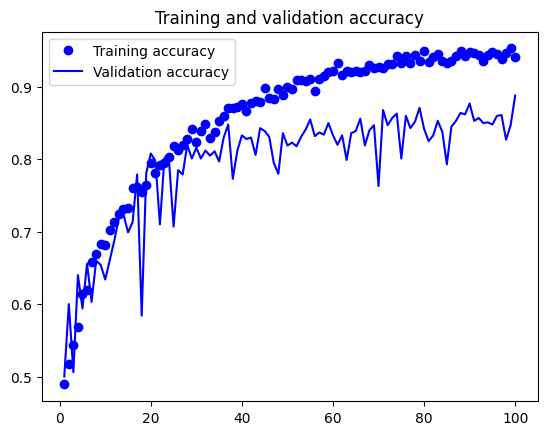

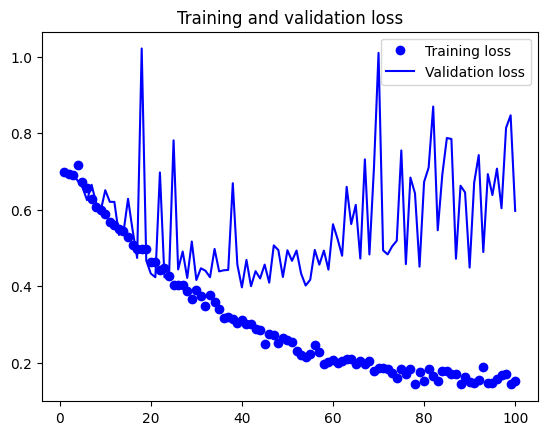

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Let’s check the test accuracy.

In [14]:
# Evaluating the model on the test set

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

20/63 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8325 - loss: 0.4118

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8243 - loss: 0.4297
Test accuracy: 0.812


## Feature extraction: Leveraging a pretrained model.


A common and highly effective approach to deep learning on small image datasets is to use a pretrained model. A pretrained model is a model that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, the spatial hierarchy of features learned by the pretrained model can effectively act as a generic model of the visual world, and hence, its features can prove useful for many different computer vision problems, even though these new problems may involve completely different classes than those of the original task.


In this case, let’s consider a large convnet trained on the ImageNet dataset (1.4 million labeled images and 1,000 different classes). ImageNet contains many animal classes, including different species of cats and dogs, and you can thus expect it to perform well on the dogs-versus-cats classification problem. We’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014


The VGG16 model, among others, comes prepackaged with Keras. You can import it from the keras.applications module. Many other image-classification models (all pretrained on the ImageNet dataset) are available as part of keras.applications:

-> Xception

-> ResNet

-> MobileNet

-> EfficientNet

-> DenseNet

-> etc.

Let’s instantiate the VGG16 model.

In [4]:
#Instantiating and freezing the VGG16 convolutional base

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,  #True: densely connected classifier that corresponds to the 1,000 classes from ImageNet.
    input_shape=(180, 180, 3) # ← this line is critical
    )
conv_base.trainable = False #Freezing

*Freezing* a layer or set of layers (e.g. convolutional base) means preventing their weights from being updated during training. If we don’t do this, the representations that were previously learned by the convolutional base will be modified during training. In Keras, we freeze a layer or model by setting its trainable attribute to False.


Now we can create a new model that chains together

1. A data augmentation stage

2. Our frozen convolutional base

3. A dense classifier

In [16]:
# Adding a data augmentation stage and a classifier to the convolutional base


input_img = keras.Input(shape=(180, 180, 3))
x = layers.RandomFlip("horizontal")(input_img)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.2)(x)
data_augmentation = keras.Model(input_img, x)


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [17]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_9        │ (None, 180, 180,  │          0 │ input_layer_5[0]… │
│ (Functional)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 180, 180)  │          0 │ functional_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 180, 180)  │          0 │ functional_9[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 180, 180)  │          0 │ functional_9[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 180, 180,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 180, 180,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 12800)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Warning: Try it by your own risk. The next technique is expensive enough that you should only attempt it if you have access to a GPU (such as the free GPU available in Colab)—it’s intractable on CPU.

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.weights.h5",
        save_weights_only=True,
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8209 - loss: 34.5178

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.8221 - loss: 34.2408 - val_accuracy: 0.9670 - val_loss: 4.2420
Epoch 2/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9277 - loss: 10.9937

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9281 - loss: 10.9335 - val_accuracy: 0.9780 - val_loss: 3.3498
Epoch 3/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9538 - loss: 5.9199

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9536 - loss: 5.9435 - val_accuracy: 0.9810 - val_loss: 2.9134
Epoch 4/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9665 - loss: 3.9424

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9663 - loss: 3.9603 - val_accuracy: 0.9750 - val_loss: 3.1599
Epoch 5/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9687 - loss: 4.0944

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9686 - loss: 4.1129 - val_accuracy: 0.9720 - val_loss: 4.9785
Epoch 6/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9859 - loss: 1.0436

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9857 - loss: 1.0629 - val_accuracy: 0.9420 - val_loss: 11.7113
Epoch 7/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9665 - loss: 4.9245

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9667 - loss: 4.8578 - val_accuracy: 0.9810 - val_loss: 2.7595
Epoch 8/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9764 - loss: 3.1870

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9765 - loss: 3.1617 - val_accuracy: 0.9800 - val_loss: 2.7739
Epoch 9/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9713 - loss: 3.6984

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9714 - loss: 3.6829 - val_accuracy: 0.9800 - val_loss: 3.0662
Epoch 10/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9827 - loss: 1.5839

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9825 - loss: 1.6001 - val_accuracy: 0.9870 - val_loss: 1.9995
Epoch 11/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9738 - loss: 2.6096

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9739 - loss: 2.6055 - val_accuracy: 0.9760 - val_loss: 3.8028
Epoch 12/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9751 - loss: 2.7232

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9750 - loss: 2.7195 - val_accuracy: 0.9840 - val_loss: 2.0428
Epoch 13/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9803 - loss: 1.9425

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9803 - loss: 1.9374 - val_accuracy: 0.9760 - val_loss: 3.4891
Epoch 14/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9817 - loss: 1.8059

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9817 - loss: 1.8015 - val_accuracy: 0.9820 - val_loss: 2.7557
Epoch 15/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9707 - loss: 2.5357

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9708 - loss: 2.5178 - val_accuracy: 0.9820 - val_loss: 2.3475
Epoch 16/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9830 - loss: 0.9778

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9830 - loss: 0.9806 - val_accuracy: 0.9870 - val_loss: 2.1350
Epoch 17/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9813 - loss: 1.8805

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9814 - loss: 1.8605 - val_accuracy: 0.9790 - val_loss: 2.7111
Epoch 18/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9799 - loss: 1.8607

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9799 - loss: 1.8573 - val_accuracy: 0.9690 - val_loss: 3.7928
Epoch 19/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9894 - loss: 0.6175

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9893 - loss: 0.6314 - val_accuracy: 0.9830 - val_loss: 2.5681
Epoch 20/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9843 - loss: 1.1778

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9843 - loss: 1.1747 - val_accuracy: 0.9830 - val_loss: 2.5571
Epoch 21/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9762 - loss: 1.4039

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9764 - loss: 1.3977 - val_accuracy: 0.9810 - val_loss: 2.6544
Epoch 22/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9842 - loss: 1.4913

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9841 - loss: 1.4840 - val_accuracy: 0.9810 - val_loss: 2.3598
Epoch 23/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9799 - loss: 1.4178

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9800 - loss: 1.4072 - val_accuracy: 0.9820 - val_loss: 2.4281
Epoch 24/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9904 - loss: 0.5286

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9904 - loss: 0.5320 - val_accuracy: 0.9820 - val_loss: 1.9933
Epoch 25/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9857 - loss: 0.9619

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9857 - loss: 0.9562 - val_accuracy: 0.9820 - val_loss: 2.3812
Epoch 26/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9840 - loss: 1.1643

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9840 - loss: 1.1682 - val_accuracy: 0.9690 - val_loss: 3.8851
Epoch 27/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9817 - loss: 0.7409

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9818 - loss: 0.7415 - val_accuracy: 0.9810 - val_loss: 2.0971
Epoch 28/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9827 - loss: 1.1706

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9828 - loss: 1.1620 - val_accuracy: 0.9830 - val_loss: 2.0411
Epoch 29/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9812 - loss: 1.1261

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9812 - loss: 1.1223 - val_accuracy: 0.9810 - val_loss: 1.8950
Epoch 30/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9867 - loss: 0.9981

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9868 - loss: 0.9895 - val_accuracy: 0.9810 - val_loss: 2.4328
Epoch 31/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9867 - loss: 0.6973

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9866 - loss: 0.7102 - val_accuracy: 0.9830 - val_loss: 1.8474
Epoch 32/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9918 - loss: 0.4100

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9917 - loss: 0.4163 - val_accuracy: 0.9820 - val_loss: 1.8107
Epoch 33/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9861 - loss: 0.5684

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9862 - loss: 0.5662 - val_accuracy: 0.9780 - val_loss: 1.8927
Epoch 34/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9867 - loss: 0.4647

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9866 - loss: 0.4701 - val_accuracy: 0.9770 - val_loss: 2.1186
Epoch 35/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9784 - loss: 1.1376

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9786 - loss: 1.1297 - val_accuracy: 0.9850 - val_loss: 1.4601
Epoch 36/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9841 - loss: 0.7469

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9842 - loss: 0.7455 - val_accuracy: 0.9780 - val_loss: 2.6859
Epoch 37/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9821 - loss: 0.4351

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9822 - loss: 0.4331 - val_accuracy: 0.9810 - val_loss: 2.0120
Epoch 38/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9921 - loss: 0.2353

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9920 - loss: 0.2430 - val_accuracy: 0.9830 - val_loss: 1.8998
Epoch 39/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9896 - loss: 0.4707

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9895 - loss: 0.4802 - val_accuracy: 0.9830 - val_loss: 1.3638
Epoch 40/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9750 - loss: 1.5213

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9752 - loss: 1.5090 - val_accuracy: 0.9830 - val_loss: 1.7414
Epoch 41/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9896 - loss: 0.4229

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9894 - loss: 0.4317 - val_accuracy: 0.9860 - val_loss: 0.9492
Epoch 42/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9923 - loss: 0.2628

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.9922 - loss: 0.2645 - val_accuracy: 0.9800 - val_loss: 1.5577
Epoch 43/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9886 - loss: 0.7697

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9887 - loss: 0.7620 - val_accuracy: 0.9800 - val_loss: 1.9688
Epoch 44/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9899 - loss: 0.3863

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9899 - loss: 0.3876 - val_accuracy: 0.9810 - val_loss: 1.8751
Epoch 45/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9916 - loss: 0.3661

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9915 - loss: 0.3687 - val_accuracy: 0.9820 - val_loss: 1.9240
Epoch 46/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9904 - loss: 0.4169

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9904 - loss: 0.4172 - val_accuracy: 0.9820 - val_loss: 1.9060
Epoch 47/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9905 - loss: 0.4476

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9906 - loss: 0.4467 - val_accuracy: 0.9800 - val_loss: 1.8407
Epoch 48/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9929 - loss: 0.2067

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9928 - loss: 0.2118 - val_accuracy: 0.9840 - val_loss: 2.3984
Epoch 49/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9897 - loss: 0.2913

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9897 - loss: 0.2912 - val_accuracy: 0.9830 - val_loss: 1.9830
Epoch 50/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9933 - loss: 0.3927

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.9932 - loss: 0.3955 - val_accuracy: 0.9770 - val_loss: 1.8652


Let's plot the results and check the test accuracy

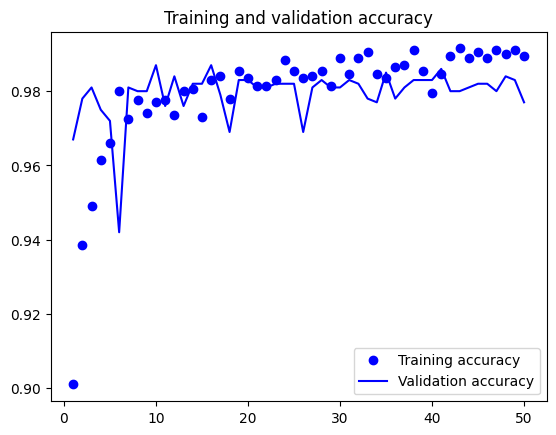

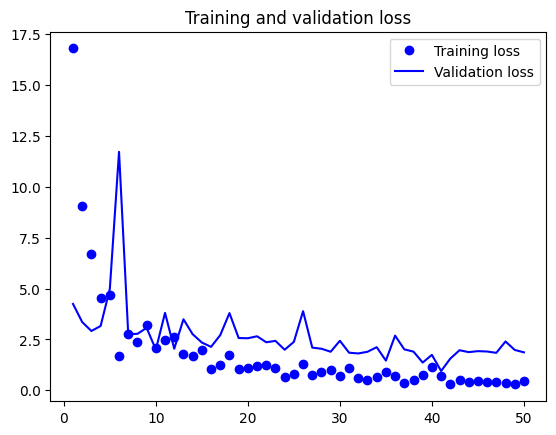

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

You must rebuild the same model architecture before loading weights.

In [8]:
# Rebuild the exact model (same code as before)

conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
conv_base.trainable = False

input_img = keras.Input(shape=(180, 180, 3))
x = layers.RandomFlip("horizontal")(input_img)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.2)(x)
data_augmentation = keras.Model(input_img, x)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


Now load the weights

In [21]:
model.load_weights("feature_extraction_with_data_augmentation.weights.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Evaluate

In [22]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 9/63 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9866 - loss: 1.2020

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9774 - loss: 2.2635
Test accuracy: 0.976


We get a test accuracy of 97.6%. This is only a modest improvement compared to the previous test accuracy, which is a bit disappointing given the strong results on the validation data.

### Fine-tuning a pretrained model

Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model and these top layers.

This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused in order to make them more relevant for the problem at hand.


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

We’ll fine-tune the last three convolutional layers, which means all layers up to block4_ pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable.

Why not fine-tune more layers? Why not fine-tune the entire convolutional base? You could. But you need to consider the following:

-> Earlier layers in the convolutional base encode more generic, reusable features, whereas layers higher up encode more specialized features. It’s more useful to fine-tune the more specialized features, because these are the ones that need to be repurposed on your new problem.

-> The more parameters you’re training, the more you’re at risk of overfitting. The convolutional base has 15 million parameters, so it would be risky to attempt to train it on your small dataset.

In [6]:
#Freezing all layers until the fourth from the last

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Now we can begin fine-tuning the model. We’ll do this with the RMSprop optimizer, using a very low learning rate. The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the three layers we’re fine-tuning. Updates that are too large may harm these representations.

In [9]:
#Fine-tuning the model

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.weights.h5",
        save_weights_only=True,
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2025-06-17 06:26:53.577474: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6110 - loss: 9.3547

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.6124 - loss: 9.3113 - val_accuracy: 0.9050 - val_loss: 1.3969
Epoch 2/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8254 - loss: 2.9359

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.8258 - loss: 2.9302 - val_accuracy: 0.9430 - val_loss: 0.7247
Epoch 3/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8680 - loss: 2.5654

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.8679 - loss: 2.5667 - val_accuracy: 0.9560 - val_loss: 0.5120
Epoch 4/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8860 - loss: 1.7123

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.8862 - loss: 1.7101 - val_accuracy: 0.9670 - val_loss: 0.4162
Epoch 5/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9098 - loss: 1.4103

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.9101 - loss: 1.4076 - val_accuracy: 0.9570 - val_loss: 0.4844
Epoch 6/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9324 - loss: 1.2694

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9323 - loss: 1.2701 - val_accuracy: 0.9690 - val_loss: 0.3746
Epoch 7/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9348 - loss: 1.1062

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9347 - loss: 1.1102 - val_accuracy: 0.9700 - val_loss: 0.3745
Epoch 8/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9356 - loss: 0.9974

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9355 - loss: 1.0060 - val_accuracy: 0.9760 - val_loss: 0.3660
Epoch 9/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9327 - loss: 1.0836

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9331 - loss: 1.0761 - val_accuracy: 0.9750 - val_loss: 0.3309
Epoch 10/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9461 - loss: 0.6693

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9460 - loss: 0.6720 - val_accuracy: 0.9760 - val_loss: 0.3414
Epoch 11/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9373 - loss: 0.8993

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9376 - loss: 0.8989 - val_accuracy: 0.9750 - val_loss: 0.3355
Epoch 12/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9465 - loss: 0.9451

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9467 - loss: 0.9419 - val_accuracy: 0.9780 - val_loss: 0.2853
Epoch 13/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9576 - loss: 0.8204

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9574 - loss: 0.8223 - val_accuracy: 0.9790 - val_loss: 0.3420
Epoch 14/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9564 - loss: 0.8564

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9559 - loss: 0.8621 - val_accuracy: 0.9790 - val_loss: 0.3453
Epoch 15/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9614 - loss: 0.7025

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9611 - loss: 0.7064 - val_accuracy: 0.9790 - val_loss: 0.2665
Epoch 16/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9570 - loss: 0.6608

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9570 - loss: 0.6610 - val_accuracy: 0.9800 - val_loss: 0.2992
Epoch 17/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9600 - loss: 0.7103

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9599 - loss: 0.7123 - val_accuracy: 0.9800 - val_loss: 0.2820
Epoch 18/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9609 - loss: 0.6217

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9609 - loss: 0.6220 - val_accuracy: 0.9800 - val_loss: 0.3813
Epoch 19/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9641 - loss: 0.6398

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9639 - loss: 0.6437 - val_accuracy: 0.9790 - val_loss: 0.2784
Epoch 20/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9601 - loss: 0.6518

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9602 - loss: 0.6512 - val_accuracy: 0.9810 - val_loss: 0.2692
Epoch 21/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9549 - loss: 0.6931

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9549 - loss: 0.6908 - val_accuracy: 0.9790 - val_loss: 0.3035
Epoch 22/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9606 - loss: 0.6040

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9607 - loss: 0.6025 - val_accuracy: 0.9820 - val_loss: 0.2918
Epoch 23/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9679 - loss: 0.5352

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9679 - loss: 0.5349 - val_accuracy: 0.9780 - val_loss: 0.3143
Epoch 24/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9571 - loss: 0.5860

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9573 - loss: 0.5826 - val_accuracy: 0.9830 - val_loss: 0.3683
Epoch 25/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9558 - loss: 0.5379

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9561 - loss: 0.5363 - val_accuracy: 0.9850 - val_loss: 0.2405
Epoch 26/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9664 - loss: 0.4121

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9664 - loss: 0.4132 - val_accuracy: 0.9830 - val_loss: 0.2529
Epoch 27/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9545 - loss: 0.6896

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9548 - loss: 0.6839 - val_accuracy: 0.9850 - val_loss: 0.2511
Epoch 28/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9663 - loss: 0.3225

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9663 - loss: 0.3229 - val_accuracy: 0.9860 - val_loss: 0.2494
Epoch 29/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9765 - loss: 0.3322

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9764 - loss: 0.3346 - val_accuracy: 0.9840 - val_loss: 0.3373
Epoch 30/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9723 - loss: 0.3575

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9721 - loss: 0.3608 - val_accuracy: 0.9830 - val_loss: 0.2728


We can finally evaluate this model on the test data:

In [11]:
# Step 1: Rebuild the conv_base and partially unfreeze VGG16
conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

# Unfreeze the top 4 layers for fine-tuning
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

# Step 2: Rebuild the data augmentation layer
input_img = keras.Input(shape=(180, 180, 3))
x = layers.RandomFlip("horizontal")(input_img)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.2)(x)
data_augmentation = keras.Model(input_img, x)

# Step 3: Rebuild the full model
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Step 4: Compile the model with fine-tuning learning rate
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["accuracy"]
)

# Step 5: Load the fine-tuned weights
model.load_weights("fine_tuning.weights.h5")

# Step 6: Evaluate on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9888 - loss: 0.1521

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9824 - loss: 0.2883
Test accuracy: 0.975


Here, we get a test accuracy of 97.5%.

In the original Kaggle competition around this dataset, this would have been one of the top results. It’s not quite a fair comparison, however, since we used pretrained features that already contained prior knowledge about cats and dogs, which competitors couldn’t use at the time.

On the positive side, by leveraging modern deep learning techniques, we managed to reach this result using only a small fraction of the training data that was available for the competition (about 10%). There is a huge difference between being able to train on 20,000 samples compared to 2,000 samples!